In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#load_n = 50 # from 280
X_train = np.load('data/X_train.npy')#[0:load_n]
y = np.genfromtxt('data/y_1.csv', delimiter='\n')#[0:load_n]
#data_test = np.load('data/X_test.npy')

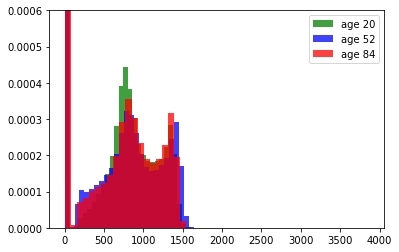

In [36]:
# Let's take a look at the values
# 0 has age 20, 9 has 52, 3 has age  84,
plt.hist(X_train[0], 50, normed=1, facecolor='green', alpha=0.75, label='age 20')
plt.hist(X_train[9], 50, normed=1, facecolor='blue', alpha=0.75, label='age 52')
plt.hist(X_train[3], 50, normed=1, facecolor='red', alpha=0.75, label='age 84')
plt.ylim([0, 0.0006])
#plt.xlim([0, 2000]) # nearly no values >2000
plt.legend()
plt.show()

In [73]:
stats = []
for i in range(0, len(X_train)):
    d = X_train[i]
    stats.append([
        np.mean(d),
        np.std(d),
        np.var(d),
        np.max(d),
        np.count_nonzero(d),
        
        # make bins
        ((1 < d) & (d <= 300)).sum(),
        ((300 < d) & (d <= 600)).sum(),
        ((600 < d) & (d <= 900)).sum(),
        ((900 < d) & (d <= 1200)).sum(),
        ((1200 < d) & (d <= 1600)).sum(),
    ])

vlog = np.vectorize(lambda x: np.log(x + 1))
y_log = vlog(y)

In [74]:
# Correlations of statistics with age
print("mean:", np.corrcoef([x[0] for x in stats], y)[0][1])
print("std:", np.corrcoef([x[1] for x in stats], y)[0][1])
print("var:", np.corrcoef([x[2] for x in stats], y)[0][1])
print("max:", np.corrcoef([x[3] for x in stats], y)[0][1])
print("non zero:", np.corrcoef([x[4] for x in stats], y)[0][1])
print()
print("1 ... 300:", np.corrcoef([x[5] for x in stats], y)[0][1])
print("300 ... 600:", np.corrcoef([x[6] for x in stats], y)[0][1])
print("600 ... 900:", np.corrcoef([x[7] for x in stats], y)[0][1])
print("900 ... 1200:", np.corrcoef([x[8] for x in stats], y)[0][1])
print("1200 ... 1600:", np.corrcoef([x[9] for x in stats], y)[0][1])

mean: -0.664581723448
std: 0.424272683807
var: 0.42574441758
max: 0.125388254806
non zero: 0.0655713119001

1 ... 300: 0.842089379749
300 ... 600: 0.754220017075
600 ... 900: -0.901096226242
900 ... 1200: 0.597727266538
1200 ... 1600: 0.294392132924


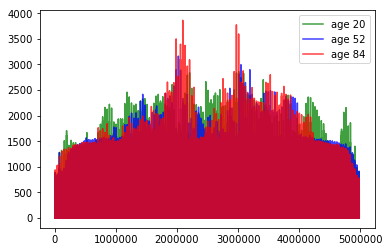

In [35]:
#np.save('data/X_train_sm.npy', X_train[:50])
#np.savetxt('data/y_1_log.csv', y_log, delimiter='\n')

plt.plot(list(range(0, len(X_train[0][672000 : -786000]))), X_train[0][672000 : -786000], color='green', alpha=0.75, label='age 20')
plt.plot(list(range(0, len(X_train[9][672000 : -786000]))), X_train[9][672000 : -786000], color='blue', alpha=0.75, label='age 52')
plt.plot(list(range(0, len(X_train[3][672000 : -786000]))), X_train[3][672000 : -786000], color='red', alpha=0.75, label='age 84')
plt.legend()
plt.show()

In [5]:
#for i in range(0, len(X_train)):
#    d = X_train[i]
#    print(d[0:672000].sum(), d[-786000:].sum())

l = 60
row = X_train[1][672000 : -786000]
num_bins = int(len(row) / l)
row = row[0 : num_bins*l] # crop last elements, they are probably 0 anyway
splits = np.split(row, num_bins)
#list(zip(np.mean(splits, axis=1), np.max(splits, axis=1)))

In [ ]:
from sklearn.preprocessing import StandardScaler, Normalizer
sc = StandardScaler()
no = Normalizer()

X_train = sc.fit_transform(X_train)

plt.plot(list(range(0, len(X_train[0][672000 : -786000]))), X_train[0][672000 : -786000], color='green', alpha=0.75, label='age 20')
plt.plot(list(range(0, len(X_train[1][672000 : -786000]))), X_train[1][672000 : -786000], color='blue', alpha=0.75, label='age 25')
plt.plot(list(range(0, len(X_train[4][672000 : -786000]))), X_train[4][672000 : -786000], color='red', alpha=0.75, label='age 23')
plt.legend()
plt.show()

In [20]:
# For some slices (columns) through all rows compute std
l = 62
num_bins = int(len(X_train[0][672000 : -786000]) / l)
means = []
for i in range(0, len(X_train)):
    row = X_train[i][672000 : -786000]
    row = row[0 : num_bins*l]
    splits = np.split(row, num_bins)
    means.append(np.mean(splits, axis=1))

col_std = []
for col in np.array(means).T:
    col_std.append(np.std(col))


In [21]:
# Save the indexes of the columns where std=0 for the means
col_std = np.array(col_std)
list((col_std == 0))
zero_std_ind = np.where(col_std==0)[0]
np.savetxt('data/zero_std_ind_'+str(l)+'.csv', zero_std_ind, delimiter=',')

print(len(zero_std_ind), 'are zero of', len(col_std), ', used len:', l)

35505 are zero of 80403 , used len: 62


In [72]:
#plt.hist(y, 50, normed=1, facecolor='green', alpha=0.75, label='age 20')
#plt.show()
#y
#len(X_train[0][672000 : -786000])/30
#len(np.genfromtxt('data/zero_std_ind.csv', delimiter=','))
#print(len(np.array(means).T[0]), len(y))
print('num of cols', len(np.array(means).T))
cols_zero = []
for i in range(0, len(np.array(means).T)):
    if np.array(means).T[i].sum() == 0:
        cols_zero.append(i)
        continue
        
    c = np.corrcoef(np.array(means).T[i], y)[0][1]
    print(i, c)
#np.array(means).T[100]

num of cols 166166
13 0.20506824032
18 0.19714629054
19 0.147972761098
24 0.19743423473
25 0.222342682881
30 0.184006861355
31 0.294788810338
36 0.180159208222
42 0.161737816897
47 0.150224806134
48 0.140138554873
53 0.112301669605
54 0.133743302687
59 0.0606681965445
60 0.171528729428
65 0.0213782936209
66 0.217220709227
71 0.012511626488
72 0.263584609808
77 -0.00111363989849
78 0.3060538257
83 0.0334820923912
84 0.367116849221
88 0.100028760926
89 0.0544576062975
94 0.0936638079464
95 0.0179637105852
100 0.0549353533777
101 0.0213027219973
106 0.0342311616785
107 0.0577115274697
112 0.0162416847743
113 0.126241856862
118 0.0255605356544
119 0.20226088911
124 0.0556789140175
125 0.263470722147
129 0.1081442697
130 0.0917106573696
135 0.115964590998
136 0.102063832216
141 0.11280399304
142 0.116161895272
147 0.104193903515
148 0.133275862933
153 0.105652948487


KeyboardInterrupt: 

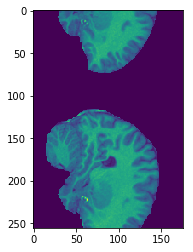

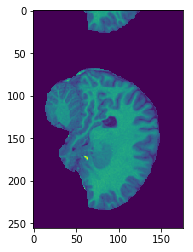

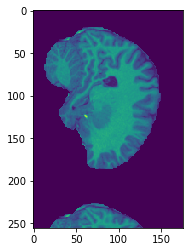

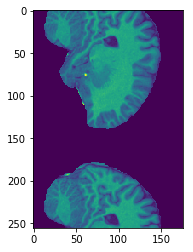

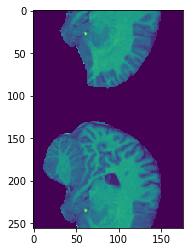

In [61]:
# Find out what the list of values was
# 0s at beginning: 672390 , 0s at end: 786303
# greatest common divider: 9, other common divider 3
# so the values may be rgb pixels, but probably
# divisors of len(row) = 6443008
# ... | 1024 | 1144 | 1408 | 1573 | 1664 | 1936 | 2048 | 2288 | 2816 | 3146 | 3328 | 3872 | 4096 | 4576 | 5632 | 6292 | 6656 | 7744 | 9152 | 11264 | 12584 | 13312 | 15488 | 18304 | 22528 | 25168 | 26624 | 30976 | 36608 | 45056 | 50336 | 53248 | 61952 | 73216 | 100672 | 123904 | 146432 | 201344 | 247808 | 292864 | 402688 | 495616 | 585728 | 805376 | 1610752 | 3221504 | 6443008 (78 divisors)
divisors = "104 | 121 | 128 | 143 | 176 | 208 | 242 | 256 | 286 | 352 | 416 | 484 | 512 | 572 | 704 | 832 | 968 | 1024 | 1144 | 1408 | 1573 | 1664 | 1936 | 2048 | 2288 | 2816 | 3146 | 3328 | 3872 | 4096 | 4576 | 5632 | 6292 | 6656 | 7744 | 9152 | 11264 | 12584 | 13312 | 15488 | 18304 | 22528 | 25168 | 26624 | 30976 | 36608 | 45056 | 50336 | 53248 | 61952 | 73216 | 100672 | 123904 | 146432 | 201344".split(' | ')
row = X_train[0]
for i, val in enumerate(row[::-1]):
    break
    if val > 0:
        print(i)
        break
for d in [2816]:#divisors:
    break
    ll = int(d)    
    print(ll)
    hh = int(len(row)/ll)
    plt.imshow(np.split(row, hh))
    plt.show()
    
for i in range(50, 55):
    row = X_train[0][i*(256 * 176) : (i+1) * (256 * 176)]
    plt.imshow(np.split(row, 256))
    plt.show()
    
#6443008 / 256 / 176